In [49]:
# melakukan import modul python
import warnings; warnings.simplefilter('ignore')
import scipy
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('bmh'); sns.set()

In [50]:
# membaca data 
data = pd.read_csv('Downloads/16. data mining/semarang heboh.csv')

In [51]:
print(data)

     No Tanggal Iklan                                                URL  \
0     1    04-09-2021  https://www.rumah123.com/properti/semarang/hos...   
1     2    04-09-2021  https://www.rumah123.com/properti/semarang/hos...   
2     3    04-09-2021  https://www.rumah123.com/properti/semarang/hos...   
3     4    04-09-2021  https://www.rumah123.com/properti/semarang/hos...   
4     5    04-09-2021  https://www.rumah123.com/properti/semarang/hos...   
..  ...           ...                                                ...   
95   96    03-15-2021  https://www.rumah123.com/properti/semarang/hos...   
96   97    03-15-2021  https://www.rumah123.com/properti/semarang/hos...   
97   98    03-12-2021  https://www.rumah123.com/properti/semarang/hos...   
98   99    03-12-2021  https://www.rumah123.com/properti/semarang/hos...   
99  100    03-10-2021  https://www.rumah123.com/properti/semarang/hos...   

    Harga_Juta      Kota  Luas Tanah  Luas Bangunan  Kamar Tidur  Kamar Mandi  \
0     

In [52]:
# Tipe Datanya : DataFrame (df)
print(type(data))
# Ukuran Data
N, P = data.shape
'baris = ', N, ', Kolom = ', P

<class 'pandas.core.frame.DataFrame'>


('baris = ', 100, ', Kolom = ', 17)

In [53]:
# "Mengintip" beberapa data pertamanya
data.head(1)

,No,Tanggal Iklan,URL,Harga_Juta,Kota,Luas Tanah,Luas Bangunan,Kamar Tidur,Kamar Mandi,Kamar Tidur Pembantu,Kamar Mandi Pembantu,Carport,Garasi,Listrik,Surat,Judul,Deskripsi
0,1,04-09-2021,https://www.rumah123.com/properti/semarang/hos...,2800.0,Semarang,200,150,4,3,1,1,0,0,3500,SHM,RUMAH MODERN MINIMALIS DI KOTA MANDIRI BSB SEM...,"- LOKASI DI DALAM CLUSTER ELITE, CITRALAND BSB..."


In [54]:
# "Mengi1tip" beberapa data akhirnya
data.tail(1)

,No,Tanggal Iklan,URL,Harga_Juta,Kota,Luas Tanah,Luas Bangunan,Kamar Tidur,Kamar Mandi,Kamar Tidur Pembantu,Kamar Mandi Pembantu,Carport,Garasi,Listrik,Surat,Judul,Deskripsi
99,100,03-10-2021,https://www.rumah123.com/properti/semarang/hos...,1181.0,Semarang,69,120,2,1,1,1,2,0,2200,SHM,RUMAH STRATEGIS TENGAH KOTA PANDANARAN HILL MO...,PERUM PANDANARAN HILL SIAP HUNI.TYPE SIERRA MO...


In [55]:
# "Mengintip" data secara random
data.sample(1)

,No,Tanggal Iklan,URL,Harga_Juta,Kota,Luas Tanah,Luas Bangunan,Kamar Tidur,Kamar Mandi,Kamar Tidur Pembantu,Kamar Mandi Pembantu,Carport,Garasi,Listrik,Surat,Judul,Deskripsi
25,26,04-05-2021,https://www.rumah123.com/properti/semarang/hos...,778.7,Semarang,120,47,2,1,0,0,1,0,1300,HGB,RUMAH BARU KOTA SATELIT ALISON BSB CITRALAND,RUMAH DIJUAL SEMARANG KAWASAN KOTA SATELIT BAR...


In [56]:
# perhatikan perintahnya tidak menggunakan tanda "()" ==> Properties 
data.columns

Index(['No', 'Tanggal Iklan', 'URL', 'Harga_Juta', 'Kota', 'Luas Tanah',
       'Luas Bangunan', 'Kamar Tidur', 'Kamar Mandi', 'Kamar Tidur Pembantu',
       'Kamar Mandi Pembantu', 'Carport', 'Garasi', 'Listrik', 'Surat',
       'Judul', 'Deskripsi'],
      dtype='object')

In [57]:
# Drop kolom pertama karena tidak berguna (hanya index)
data.drop("No", axis=1, inplace=True)

In [58]:
print(data)

   Tanggal Iklan                                                URL  \
0     04-09-2021  https://www.rumah123.com/properti/semarang/hos...   
1     04-09-2021  https://www.rumah123.com/properti/semarang/hos...   
2     04-09-2021  https://www.rumah123.com/properti/semarang/hos...   
3     04-09-2021  https://www.rumah123.com/properti/semarang/hos...   
4     04-09-2021  https://www.rumah123.com/properti/semarang/hos...   
..           ...                                                ...   
95    03-15-2021  https://www.rumah123.com/properti/semarang/hos...   
96    03-15-2021  https://www.rumah123.com/properti/semarang/hos...   
97    03-12-2021  https://www.rumah123.com/properti/semarang/hos...   
98    03-12-2021  https://www.rumah123.com/properti/semarang/hos...   
99    03-10-2021  https://www.rumah123.com/properti/semarang/hos...   

    Harga_Juta      Kota  Luas Tanah  Luas Bangunan  Kamar Tidur  Kamar Mandi  \
0       2800.0  Semarang         200            150            4  

In [59]:
# tipe data di setiap kolom
# Wajib di periksa apakah tipe datanya sudah tepat?
# Perhatikan df sebagaimana semua variable di Python diperlakukan seperti object
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tanggal Iklan         100 non-null    object 
 1   URL                   100 non-null    object 
 2   Harga_Juta            100 non-null    float64
 3   Kota                  100 non-null    object 
 4   Luas Tanah            100 non-null    int64  
 5   Luas Bangunan         100 non-null    int64  
 6   Kamar Tidur           100 non-null    int64  
 7   Kamar Mandi           100 non-null    int64  
 8   Kamar Tidur Pembantu  100 non-null    int64  
 9   Kamar Mandi Pembantu  100 non-null    int64  
 10  Carport               100 non-null    int64  
 11  Garasi                100 non-null    int64  
 12  Listrik               100 non-null    int64  
 13  Surat                 100 non-null    object 
 14  Judul                 100 non-null    object 
 15  Deskripsi             10

# Mengganti Tipe Data

In [60]:
# Merubah tipe data "jika" tidak tepat, contoh:
data.dtypes

Tanggal Iklan            object
URL                      object
Harga_Juta              float64
Kota                     object
Luas Tanah                int64
Luas Bangunan             int64
Kamar Tidur               int64
Kamar Mandi               int64
Kamar Tidur Pembantu      int64
Kamar Mandi Pembantu      int64
Carport                   int64
Garasi                    int64
Listrik                   int64
Surat                    object
Judul                    object
Deskripsi                object
dtype: object

In [61]:
# dataframe types: https://pbpython.com/pandas_dtypes.html
data['Tanggal Iklan'] = data['Tanggal Iklan'].astype('datetime64')
data['Surat'] = data['Surat'].astype('category')
data['Harga_Juta'] = data['Harga_Juta'].astype('float64')
data['Luas Tanah'] = data['Luas Tanah'].astype('float64')
data['Luas Bangunan'] = data['Luas Bangunan'].astype('float64')
data.dtypes

Tanggal Iklan           datetime64[ns]
URL                             object
Harga_Juta                     float64
Kota                            object
Luas Tanah                     float64
Luas Bangunan                  float64
Kamar Tidur                      int64
Kamar Mandi                      int64
Kamar Tidur Pembantu             int64
Kamar Mandi Pembantu             int64
Carport                          int64
Garasi                           int64
Listrik                          int64
Surat                         category
Judul                           object
Deskripsi                       object
dtype: object

# Memeriksa Duplikasi Data

In [62]:
#mengecek apakah ada duplikat data?
print(data.shape)
data.duplicated().sum()

(100, 16)


0

In [63]:
#menghapus entri yang memiliki data duplikat 
data.drop_duplicates(inplace=True)
print(data.duplicated().sum()) # tidak ada lagi duplikat
print(data.shape) # mengecek kembali dengan print data.shape

0
(100, 16)


In [64]:
# Memilih hanya variable dengan tipe tertentu
data_num = data.select_dtypes(include = ['float64', 'int64'])
data_num.head()
# Perhatikan data_num adalah variable df baru! ... (hati-hati di data yang besar)

,Harga_Juta,Luas Tanah,Luas Bangunan,Kamar Tidur,Kamar Mandi,Kamar Tidur Pembantu,Kamar Mandi Pembantu,Carport,Garasi,Listrik
0,2800.0,200.0,150.0,4,3,1,1,0,0,3500
1,550.0,63.0,63.0,2,1,0,0,0,0,1300
2,290.0,82.0,30.0,2,1,0,0,0,0,1300
3,6900.0,610.0,1250.0,4,5,0,0,0,1,8000
4,500.0,108.0,120.0,6,3,0,0,0,0,1300


In [65]:
# Memilih hanya variable dengan tipe tertentu
data_cat = data.select_dtypes(include = ['category', 'datetime64', 'object'])
data_cat.head()

,Tanggal Iklan,URL,Kota,Surat,Judul,Deskripsi
0,2021-04-09,https://www.rumah123.com/properti/semarang/hos...,Semarang,SHM,RUMAH MODERN MINIMALIS DI KOTA MANDIRI BSB SEM...,"- LOKASI DI DALAM CLUSTER ELITE, CITRALAND BSB..."
1,2021-04-09,https://www.rumah123.com/properti/semarang/hos...,Semarang,SHM,RUMAH SIAP HUNI DITENGAH KOTA... JL. MANGGIS L...,RUMAH TENGAH KOTA JL MANGGIS LAMPER TENGAH. LU...
2,2021-04-09,https://www.rumah123.com/properti/semarang/hos...,Semarang,SHM,RUMAH BANYUMANIK STRATEGIS TERMURAH HARGA PROMO,RUMAH GEDAWANG BANYUMANIK MURAH BANGET HARGA P...
3,2021-04-09,https://www.rumah123.com/properti/semarang/hos...,Semarang,SHM,RUMAH BAGUS DI BUKIT COKLAT (DNY),RUMAH BAGUS DI BUKIT COKLAT (DNY) 2 LANTAI + 1...
4,2021-04-09,https://www.rumah123.com/properti/semarang/hos...,Semarang,SHM,RUMAH DENGAN KAMAR BANYAK DI KETILENG,BANYAK DI KETILENG LUAS 108M BANGUNAN1.5 LANTA...


In [66]:
df = pd.get_dummies(data['Kamar Tidur Pembantu'], prefix='rumah')
df.head()

,rumah_0,rumah_1,rumah_2,rumah_3
0,0,1,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [67]:
df2 = pd.concat([data, df], axis = 1)
df2.head().transpose()

,0,1,2,3,4
Tanggal Iklan,2021-04-09 00:00:00,2021-04-09 00:00:00,2021-04-09 00:00:00,2021-04-09 00:00:00,2021-04-09 00:00:00
URL,https://www.rumah123.com/properti/semarang/hos...,https://www.rumah123.com/properti/semarang/hos...,https://www.rumah123.com/properti/semarang/hos...,https://www.rumah123.com/properti/semarang/hos...,https://www.rumah123.com/properti/semarang/hos...
Harga_Juta,2800,550,290,6900,500
Kota,Semarang,Semarang,Semarang,Semarang,Semarang
Luas Tanah,200,63,82,610,108
Luas Bangunan,150,63,30,1250,120
Kamar Tidur,4,2,2,4,6
Kamar Mandi,3,1,1,5,3
Kamar Tidur Pembantu,1,0,0,0,0
Kamar Mandi Pembantu,1,0,0,0,0


In [68]:
# Memilih beberapa kolom secara manual
X = data[['Harga_Juta','Luas Tanah','Luas Bangunan']] 
X[11:20]

,Harga_Juta,Luas Tanah,Luas Bangunan
11,750.0,120.0,100.0
12,290.0,84.0,30.0
13,625.0,86.0,100.0
14,975.0,150.0,250.0
15,875.0,112.0,160.0
16,1650.0,300.0,400.0
17,950.0,150.0,250.0
18,623.0,97.0,60.0
19,850.0,133.0,120.0


# Apakah Adanya Kamar Tidur Pembantu Mempengaruhi Harga Jual Pada Rumah ?

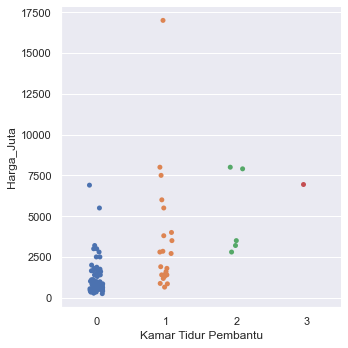

In [69]:
p= sns.catplot(x="Kamar Tidur Pembantu", y="Harga_Juta", data=data)
# Apa yang bisa dilihat dari hasil ini?

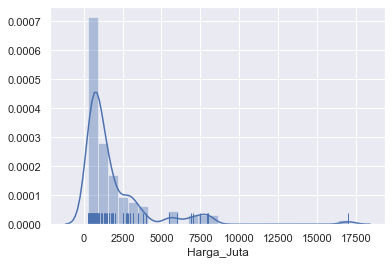

In [70]:
# Distribusinya
p = sns.distplot(data['Harga_Juta'], kde=True, rug=True)

# Menghapus Outlier Pada Variabel Harga

In [71]:
# Misal dengan asumsi data berdistribusi normal
# dan menggunakan 95% confidence interval di sekitar variabel "harga"

df3 = np.abs(data.Harga_Juta - data.Harga_Juta.mean())<=(2*data.Harga_Juta.std())
# mu-2s<x<mu+2s
print(df3.shape)
df3.head()

(100,)


0     True
1     True
2     True
3    False
4     True
Name: Harga_Juta, dtype: bool

In [72]:
data2 = data[df3] # Data tanpa outliers
print(data2.shape, data.shape)
# Perhatikan disini sengaja data yang telah di remove outliernya 
# disimpan dalam variabel baru "data2"
# Jika datanya besar hati-hati melakukan hal ini

(93, 16) (100, 16)


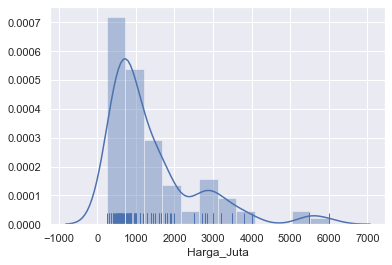

In [73]:
# Distribusinya
p = sns.distplot(data2['Harga_Juta'], kde=True, rug=True)

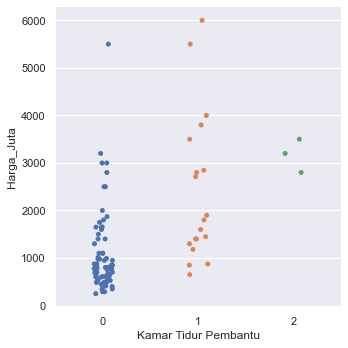

In [74]:
p= sns.catplot(x="Kamar Tidur Pembantu", y="Harga_Juta", data=data2)
# Apa yang bisa dilihat dari hasil ini?

# Memeriksa Missing Values

In [75]:
# Melihat Missing Value secara general
print(data2.isnull().sum())

Tanggal Iklan           0
URL                     0
Harga_Juta              0
Kota                    0
Luas Tanah              0
Luas Bangunan           0
Kamar Tidur             0
Kamar Mandi             0
Kamar Tidur Pembantu    0
Kamar Mandi Pembantu    0
Carport                 0
Garasi                  0
Listrik                 0
Surat                   0
Judul                   0
Deskripsi               0
dtype: int64


In [76]:
set(data2['Kamar Tidur Pembantu'])

{0, 1, 2}

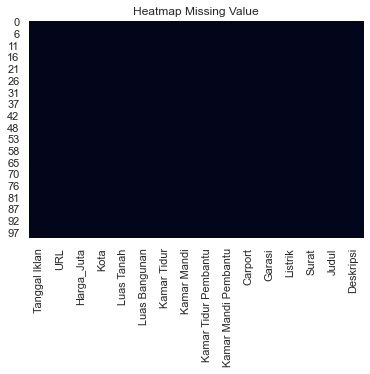

In [77]:
sns.heatmap(data2.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

# Statistika Deskriptif 

In [78]:
data2.describe()

,Harga_Juta,Luas Tanah,Luas Bangunan,Kamar Tidur,Kamar Mandi,Kamar Tidur Pembantu,Kamar Mandi Pembantu,Carport,Garasi,Listrik
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,1418.919355,182.795699,149.290323,3.258065,1.935484,0.268817,0.204301,0.784946,0.204301,2107.526882
std,1202.097110,134.724401,107.878311,1.481063,0.930246,0.513720,0.405375,1.267053,0.501284,1206.435331
min,250.000000,63.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,623.000000,102.000000,67.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1300.000000
50%,950.000000,138.000000,110.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,2200.000000
75%,1750.000000,200.000000,200.000000,4.000000,2.000000,0.000000,0.000000,1.000000,0.000000,2200.000000
max,6000.000000,1000.000000,600.000000,9.000000,5.000000,2.000000,1.000000,10.000000,2.000000,5500.000000


In [79]:
# Statistika Sederhana dari data "Numerik"-nya
data2.describe(include='all')

,Tanggal Iklan,URL,Harga_Juta,Kota,Luas Tanah,Luas Bangunan,Kamar Tidur,Kamar Mandi,Kamar Tidur Pembantu,Kamar Mandi Pembantu,Carport,Garasi,Listrik,Surat,Judul,Deskripsi
count,93,93,93.000000,93,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93,93,93
unique,19,93,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,93,92
top,2021-04-05 00:00:00,"Rumah dijual 1 lantai, 3 kamar hos8115050 | ru...",NaN,Semarang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SHM,RUMAH PEDURUNGAN SEMARANG SYUHADA TLOGOSARI RE...,LOKASINYA STRATEGIS DKT MANUNGGAL JATI MAJAPAH...
freq,17,1,NaN,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87,1,2
first,2021-03-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-04-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1418.919355,NaN,182.795699,149.290323,3.258065,1.935484,0.268817,0.204301,0.784946,0.204301,2107.526882,NaN,NaN,NaN
std,NaN,NaN,1202.097110,NaN,134.724401,107.878311,1.481063,0.930246,0.513720,0.405375,1.267053,0.501284,1206.435331,NaN,NaN,NaN
min,NaN,NaN,250.000000,NaN,63.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,623.000000,NaN,102.000000,67.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1300.000000,NaN,NaN,NaN


In [80]:
# ini adalah parameter tambahan jika kita juga ingin mendapatkan statistik sederhana seluruh datanya
# (termasuk data kategorik)
data2[['Harga_Juta','Kamar Tidur Pembantu']].describe(include='all')

,Harga_Juta,Kamar Tidur Pembantu
count,93.000000,93.000000
mean,1418.919355,0.268817
std,1202.097110,0.513720
min,250.000000,0.000000
25%,623.000000,0.000000
50%,950.000000,0.000000
75%,1750.000000,0.000000
max,6000.000000,2.000000


In [81]:
# Distribusi tiap data
data2['Kamar Tidur Pembantu'].value_counts()
# kita bisa juga visualisasikan informasi ini

0    71
1    19
2     3
Name: Kamar Tidur Pembantu, dtype: int64

In [82]:
CT = pd.crosstab(index=data2["Kamar Tidur Pembantu"], columns=data2["Harga_Juta"])
CT

Harga_Juta,250.0,290.0,343.0,350.0,399.0,400.0,410.0,440.0,450.0,475.0,...,2710.0,2800.0,2847.0,3000.0,3200.0,3500.0,3800.0,4000.0,5500.0,6000.0
Kamar Tidur Pembantu,,,,,,,,,,,,,,,,,,,,,
0,1,2,1,1,1,1,1,1,1,1,...,0,1,0,2,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0


# Visualisasi Data

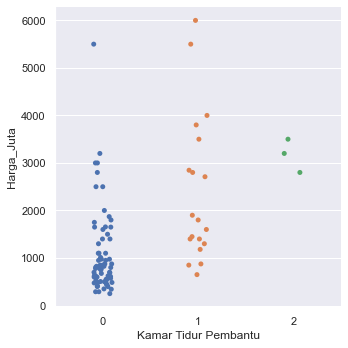

In [83]:
p= sns.catplot(x="Kamar Tidur Pembantu", y="Harga_Juta", data=data2)
# Apa yang bisa dilihat dari hasil ini?

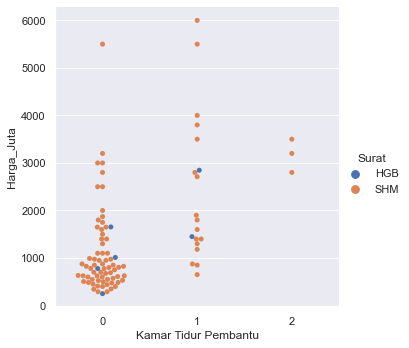

In [99]:
# Bisa juga plot dengan informasi dari 3 variabel sekaligus
# (untuk melihat kemungkinan faktor interaksi)
p= sns.catplot(x="Kamar Tidur Pembantu", y="Harga_Juta", hue="Surat", kind="swarm", data=data2)

In [85]:
data2.corr()

,Harga_Juta,Luas Tanah,Luas Bangunan,Kamar Tidur,Kamar Mandi,Kamar Tidur Pembantu,Kamar Mandi Pembantu,Carport,Garasi,Listrik
Harga_Juta,1.000000,0.585224,0.668259,0.364167,0.432962,0.512024,0.493592,0.315515,0.341740,0.407360
Luas Tanah,0.585224,1.000000,0.777890,0.421463,0.534930,0.461274,0.333543,0.540280,0.482982,0.315966
Luas Bangunan,0.668259,0.777890,1.000000,0.653300,0.719278,0.473219,0.402281,0.469319,0.569126,0.363724
Kamar Tidur,0.364167,0.421463,0.653300,1.000000,0.674920,0.107837,0.128482,0.244207,0.440631,0.219722
Kamar Mandi,0.432962,0.534930,0.719278,0.674920,1.000000,0.309627,0.208278,0.347754,0.448141,0.411091
Kamar Tidur Pembantu,0.512024,0.461274,0.473219,0.107837,0.309627,1.000000,0.777312,0.356964,0.206505,0.568441
Kamar Mandi Pembantu,0.493592,0.333543,0.402281,0.128482,0.208278,0.777312,1.000000,0.213442,0.059817,0.532455
Carport,0.315515,0.540280,0.469319,0.244207,0.347754,0.356964,0.213442,1.000000,0.412191,0.353762
Garasi,0.341740,0.482982,0.569126,0.440631,0.448141,0.206505,0.059817,0.412191,1.000000,0.114255
Listrik,0.407360,0.315966,0.363724,0.219722,0.411091,0.568441,0.532455,0.353762,0.114255,1.000000


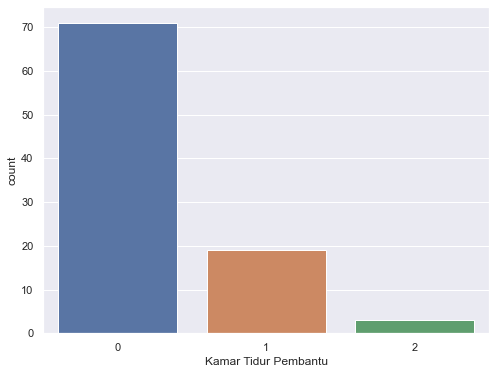

In [100]:
plt.figure(figsize=(8,6)) # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
p = sns.countplot(x="Kamar Tidur Pembantu", data=data2)

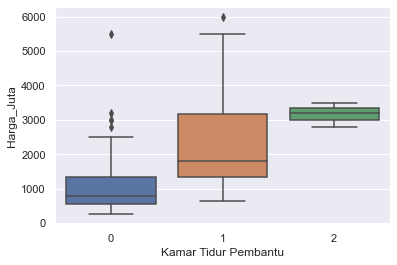

In [103]:
# BoxPlots
p = sns.boxplot(x="Kamar Tidur Pembantu", y="Harga_Juta", data=data2)
# Apa makna pola yang terlihat di data oleh BoxPlot ini?

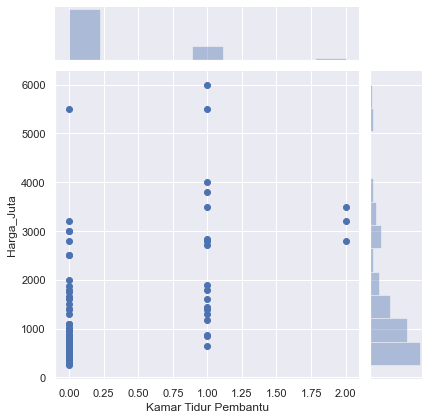

In [109]:
p = sns.jointplot(x=data2['Kamar Tidur Pembantu'], y=data2['Harga_Juta'])

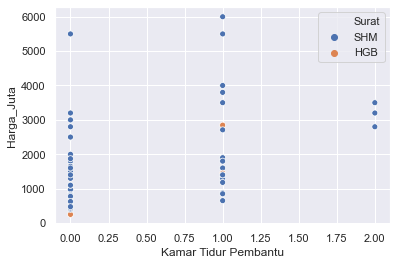

In [111]:
p = sns.scatterplot(x=data2['Kamar Tidur Pembantu'], y=data2['Harga_Juta'], hue=data2['Surat'])

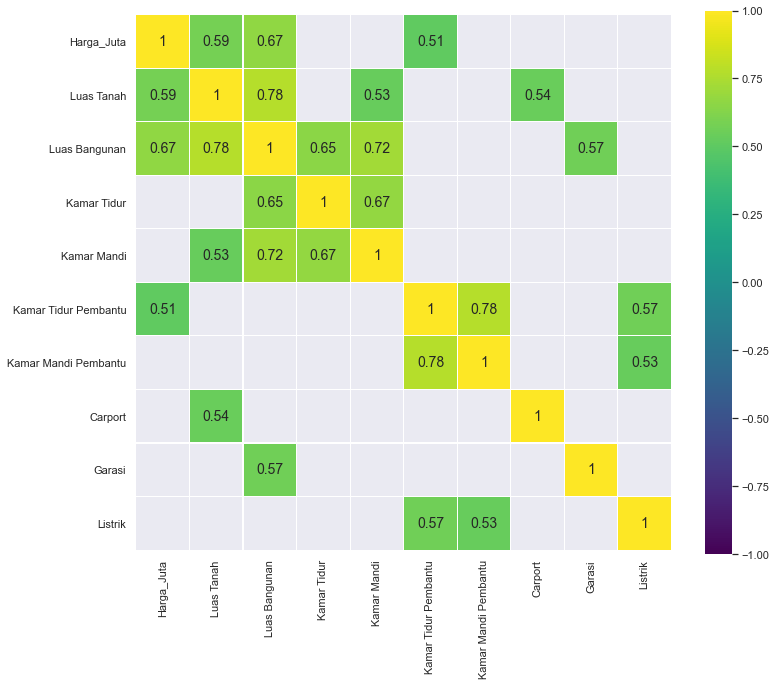

In [112]:
# HeatMap untuk menyelidiki korelasi
corr2 = data2.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);

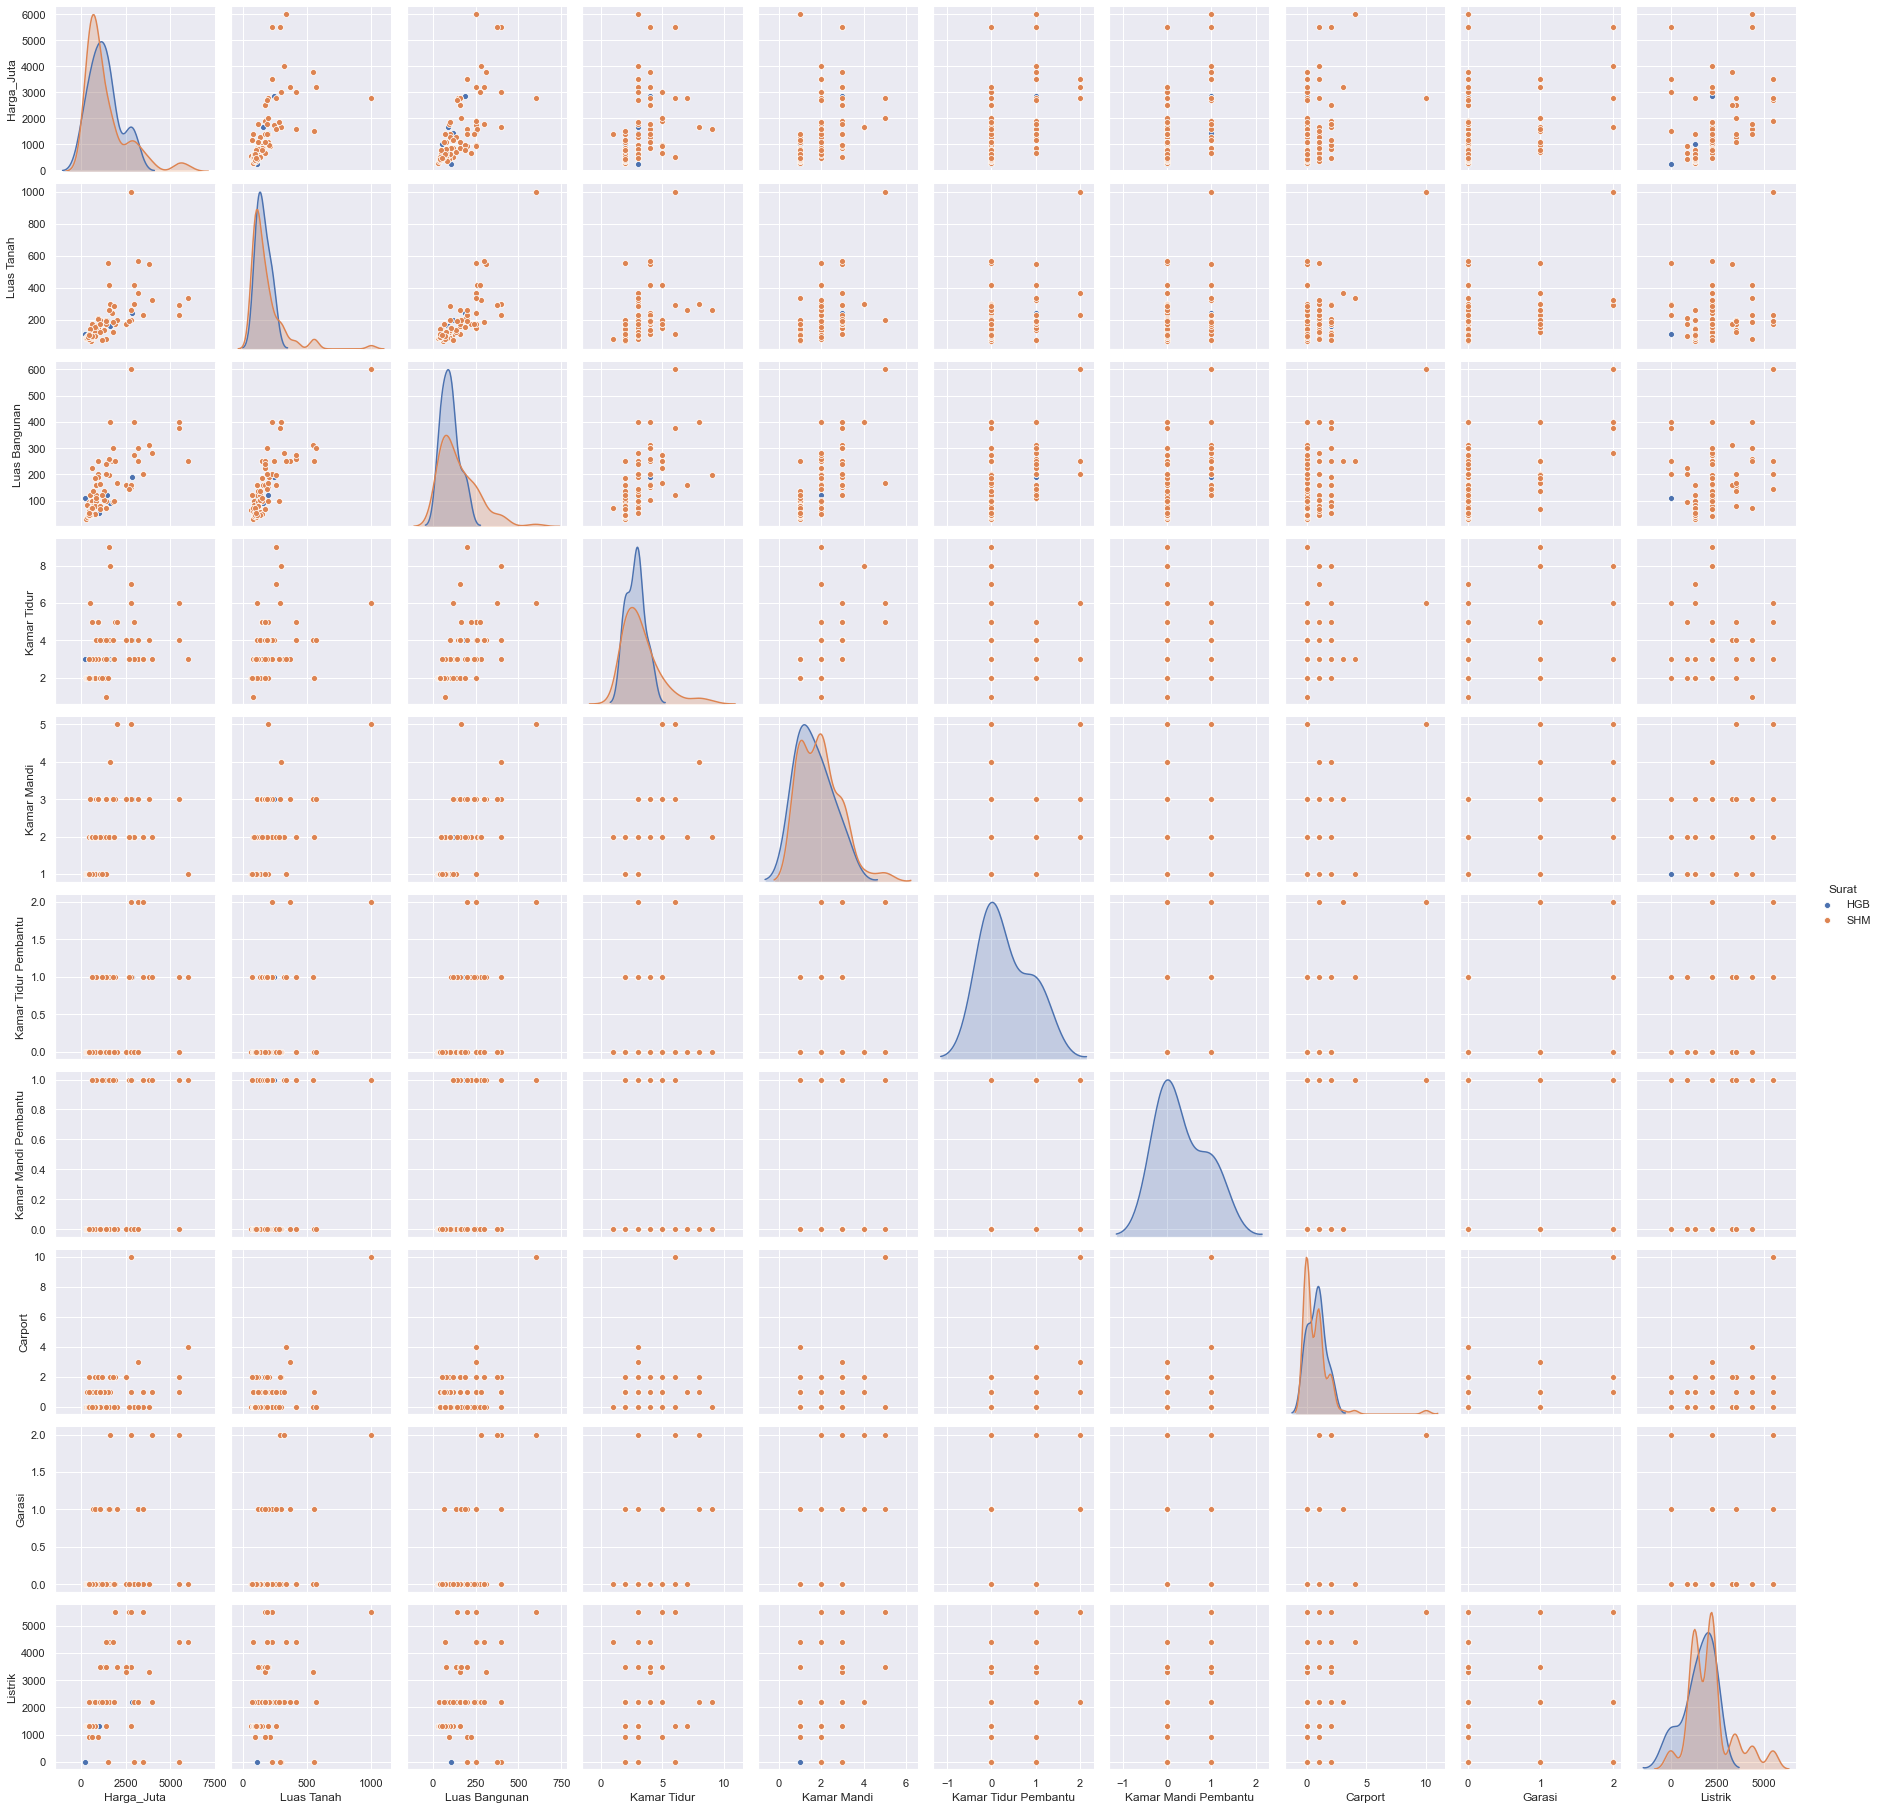

In [116]:
g = sns.pairplot(data2, hue="Surat")

# KESIMPULAN

Berdasarkan 100 data penjualan rumah di Semarang, ditemukan outlier sebanyak 7 data, untuk mengatasinya kami menghilangkan data outlier nya sehingga data yang diobservasi sebesar 93 data dari 100 data yang berhasil dikumpulkan. dari ke 93 data yang di observasi kami tidak menemukan adanya  missing value didalamnya, sehingga pre processing data pun dilanjutkan. untuk melihat keragaman datanya dilakukanlah proses statistika deskriptif. dalam proses data mining kali ini kami ingin mengetahui hubungan antara variabel "Kamar Tidur Pembantu" dan variable "Harga_Juta", berdasarkan Scatter plot dan Tabel Korelasi Hubungan antar kedua variabel ini positif yaiutu sebesar 0.512024, yang berarti bahwa jika kita asumsikan variabel selain "Kamar Tidur Pembantu" sama maka semakin banyak "Kamar Tidur Pembantu","Harga_Juta" akan semakin besar/mahal. berdasarkan tabel korelasi antar variabel, yang memiliki korelasi paling tinggi adalah "Luas Tanah" dengan "Luas Bangunan" yaitu 0.777890.

Rekomendasi :
1. Penjual
- berdasarkan tabel korelasi yang berkaitan dengan Harga jual ada 3 variabel yang memiliki nilai paling tinggi yaitu "Luas Bangunan","Luas Tanah" dan "Kamar Tidur Pembantu" sehingga dapat kita simpulkan bahwa ketika ketiga variabel ini ditingkatkan maka harga jualnya pun akan meningkat.
2. Pembeli
- berdasarkan hasil diatas dapat dilihat melalui Catplot bahwa aada beberapa rumah yang memiliki 2 kamar pembantu tetapi harga nya tidak jauh berbeda dengan yang tidak punya kamar pembantu, sehingga pembeli dapat mengoptimalkan untuk membeli rumah rumah yang memiliki potensi harga jual tinggi tetapi saat ini masih dalam ukuran yang standar.